Considering the equations reported in [this document](darcy_and_transport_equations.ipynb), we assume that the following quantities are constant and related to the geothermal and hydrostatic gradient
* the water $\rho_w$ and rock $\rho_r$ density 
* the water $\lambda_w$ and rock $\lambda_r$ thermal conductivity
* the water $c_w$ and the rock $c_r$ specific heat capacity
* the dynamic viscosity $\mu$

moreover, we assume that the domain is a flat rectangle with outward normal parallel to $\mathbf{e}_3$.

Everything marked with a `[*]` can be modified by user needs. Do not change the name in the dictionary `data`.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import porepy as pp

import darcy_and_transport_data as dt

In [2]:
pb = dict()

#[*] path for the fracture network file name
pb['file'] = 'network.csv'

#[*] folder to store the simulation results
pb['folder_name'] = 'results'

#[*] activate to export solution in vtu format (for ParaView)
pb['save_solution'] = True

# ------ general properties ------

#[*] depth of the problem, unit [m]
pb['depth'] = 2. * (pp.KILOMETER)

#[*] temperature at depth, [*C]
pb['temperature_at_depth'] = 80. * (pp.CELSIUS)

# ------ fracture/rock properties ------
pb['fracture'] = dict()

#[*] define the rock (only granite for now is available)
pb['rock'] = 'granite'

#[*] define the fracture permeability, unit [m^2 or Darcy]
pb['fracture']['permeability'] = 1. * (pp.MILLIDARCY)

#[*] define the fracture porosity, unit []
pb['fracture']['porosity'] = 1.

#[*] define the fracture aperture, unit [m]
pb['fracture']['aperture'] = 10. * (pp.MILLIMETER)

# ------ well properties ------
pb['wells'] = dict()

#[*] define the well positions, unit [m]
pb['wells']['position'] = (pp.METER) * np.array([[ 550.,  44.],
                                                  [450., 124.]])

#[*] define the well volumetric flow rate, unit [m^3/s]
pb['wells']['flow_rate'] = np.array([1e-3, -1e-3]) * (pp.METER**3/pp.SECOND)

#[*] define the temperature at well, unit [*C]
pb['wells']['temperature'] = np.array([-20., 20.]) * (pp.CELSIUS)

# ------discretization properties ------

#[*] define the mesh size of the problem
pb['mesh_size'] = 100. * (pp.METER)

#[*] end time for the simulation [s]
pb['end_time'] = 10. * (pp.YEAR)

#[*] number of time steps
pb['number_time_steps'] = 5

# geometrical tolerance for the computations, unit [m]
pb['tol'] = 1e-4 * (pp.METER)

To plot the fracture network and the wells, it can be used to place correctly the wells.

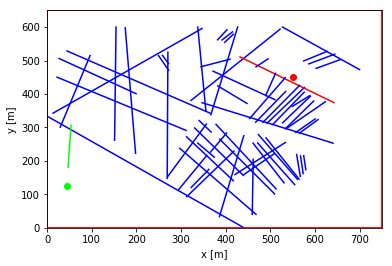

In [3]:
dt.detect_wells(pb)
dt.plot(pb)

Run single-phase flow and transport models.

In [4]:
# run the simulation and save the solution
simulation = dt.Simulation(pb)
simulation.solve("temperature", "hydraulic_head")

Solve elliptic model
Discretize
Done. Elapsed time 4.880292654037476
Solve linear system using direct solver
Done. Elapsed time 0.0952901840209961
Time stepping using 10 steps
Step 0 out of 10
Step 1 out of 10
Step 2 out of 10
Step 3 out of 10
Step 4 out of 10
Step 5 out of 10
Step 6 out of 10
Step 7 out of 10
Step 8 out of 10
Step 9 out of 10
